In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
price_data = np.load('data/prices_for_best.npy')
data_names = ['LINK_hourly.csv',
 'HT_hourly.csv',
 'OMG_hourly.csv',
 'VEN_hourly.csv',
 'MTL_hourly.csv',
 'KNC_hourly.csv',
 'REP_hourly.csv',
 'IOST_hourly.csv',
 'BTM_hourly.csv',
 'ZRX_hourly.csv',
 'AE_hourly.csv',
 'NULS_hourly.csv',
 'ELF_hourly.csv',
 'ZIL_hourly.csv',
 'KCS_hourly.csv',
 'WTC_hourly.csv',
 'BNT_hourly.csv',
 'ITC_hourly.csv',
 'NAS_hourly.csv',
 'CVC_hourly.csv',
 'ABT_hourly.csv',
 'THETA_hourly.csv',
 'HPB_hourly.csv',
 'LUN_hourly.csv',
 'ARN_hourly.csv']

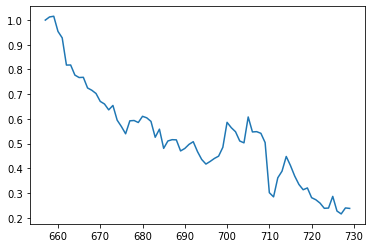

In [0]:
# Initial portfolio value is set 1
b = [1]
# Iteration by days
for i in range(658, round(price_data.shape[0]/24)-1):
  t = i*24
  # Iteration by tokens to find the best growth
  relative_price_changes = []
  for j in range(0, price_data.shape[1]):
    if price_data[:,j][t-24] !=0:
      relative_price_changes += [(price_data[:,j][t]-price_data[:,j][t-24])/price_data[:,j][t-24]]
    else:
      relative_price_changes += [-1]
  best_token_index = np.argmax(relative_price_changes)
  # Updating portfolio value
  b += [b[i-658]*(price_data[:,best_token_index][t+24]/price_data[:,best_token_index][t])*0.9975]
plt.plot(range(657, round(price_data.shape[0]/24)-1), b)
np.save('port_value_best_transact', np.array(b))
